In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df = pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [208]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [209]:
df.dropna(axis=0, inplace=True)

In [210]:
df.loc[:122, 'Region']=0
df.loc[122:, 'Region']=1

In [211]:
df['Region']= df['Region'].astype(int)

In [212]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [213]:
df=df.drop(index=123).reset_index(drop=True)

In [214]:
df['month'].unique()

array(['06', '07', '08', '09'], dtype=object)

In [215]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [216]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [217]:
df.columns= df.columns.str.strip()

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [219]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]= df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [220]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]= df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [221]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [222]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index=False)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [224]:
df.drop(['day', 'month', 'year'], axis=1, inplace= True)

In [225]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [226]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [232]:
df['Classes'].astype(str)

,Classes
0,not fire
1,not fire
2,not fire
3,not fire
4,not fire
...,...
238,fire
239,not fire
240,not fire
241,not fire


In [233]:
df['Classes']= np.where(df['Classes'].str.contains('not fire'),0,1)

In [234]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


<Axes: >

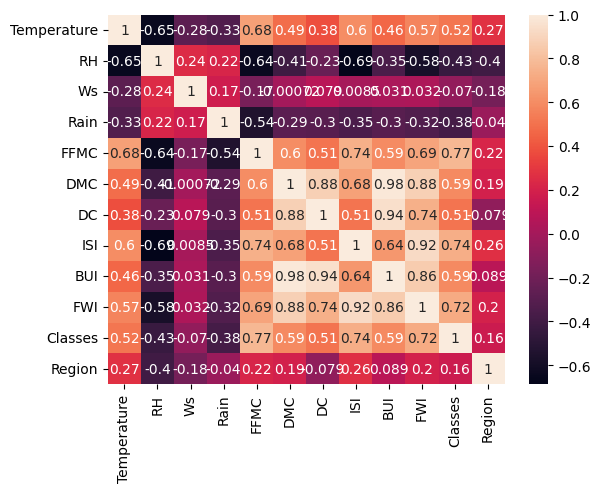

In [235]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

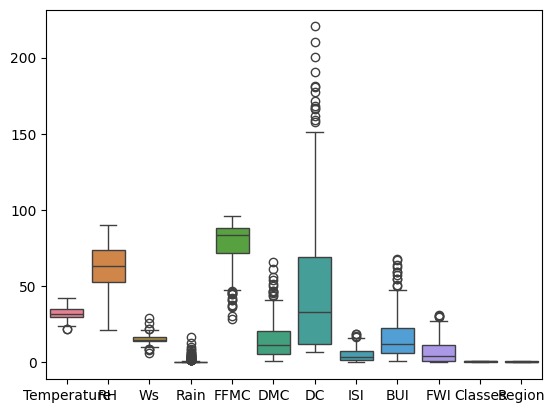

In [237]:
sns.boxplot(df)

In [251]:
X = df.drop('FWI', axis=1)
Y = df['FWI']
Y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [252]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

**Standard Scaling**

In [253]:
# from sklearn.preprocessing import StandardScaler
# scaler= StandardScaler()
# x_train= scaler.fit_transform(x_train)
# x_test= scaler.transform(x_test)
# sns.boxplot(x_train)

In [254]:
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

**Lasso Regression**

In [257]:
from sklearn.linear_model import Lasso
model= Lasso()
model.fit(x_train, y_train)

Lasso()

In [258]:
model.score(x_train, y_train)* 100, model.score(x_test, y_test)*100

(96.7547523244566, 97.027222014072)

In [259]:
y_pred= model.predict(x_test)
y_pred

array([ 8.12571009,  7.24482079,  0.23174635,  6.09304091,  6.87024634,
        1.96861294,  2.61387642,  7.67459618,  2.23394196,  3.7013328 ,
        0.65047986, 11.82334326,  9.54250632, 16.30119816, 18.61805885,
        2.01650062,  2.05688054, -1.29205013,  6.71120609,  3.49829026,
        1.91311418,  0.22456399,  6.16436513, -0.06610119, 20.00514074,
        4.97149365,  5.8213655 ,  9.85193466, -1.42803252,  9.79598133,
        6.27717413,  0.16992348, 10.11045253, 14.91031419,  1.84317601,
        1.47668525,  1.89383447,  6.44663244, -0.65208823, -0.58378871,
        7.14776161,  2.16050522,  8.25853926, -1.43305925, 15.09079669,
        7.82643415,  8.00293876,  0.99975796, 12.67960887,  1.06868847,
       28.43603736,  5.81092845, 16.30798193, 19.58324286, 14.00056778,
       16.62431556,  1.39759682,  8.95460165,  3.99958137, 14.58017616,
        5.41300075])

In [260]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test, y_pred)
rmse= root_mean_squared_error(y_test, y_pred)
mse, mae, r2, rmse

(1.3157676747376346, 0.7452938831955387, 0.97027222014072, 1.1470691673729334)

<Axes: xlabel='FWI', ylabel='FWI'>

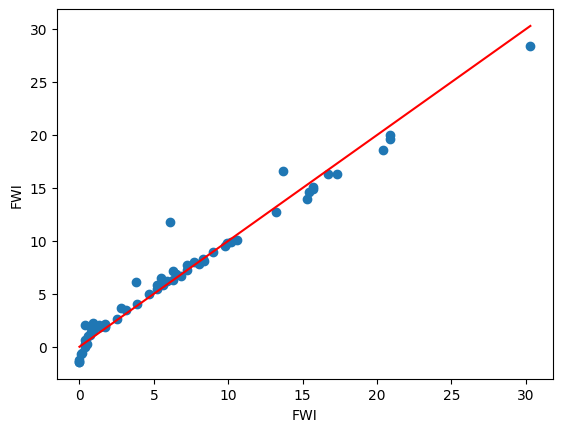

In [266]:
# plt.figure(figsize= (8,8))
plt.scatter(y_test, y_pred)
sns.lineplot(x=y_test,y=y_test, color= 'red')
# plt.show()
